Steps for Data Analysis
Questions to consider


In [1]:
import pandas as pd
import numpy as np
import missingno as msno
pd.set_option('display.max_rows', None)


In [2]:
filename  = './literacy_rates_updated - literacy_rates_updated.csv'
literacy_df = pd.read_csv(filename)
literacy_df.info()
literacy_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Region         3309 non-null   object
 1   Country        3313 non-null   object
 2   Year           3313 non-null   object
 3   Age            3313 non-null   object
 4   Gender         3313 non-null   object
 5   Literacy rate  3308 non-null   object
dtypes: object(6)
memory usage: 155.4+ KB


,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,NaN,Afghanistan,2011,15-24,female,0.3211322
3,NaN,Afghanistan,2011,15-24,male,0.6187907
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.0841276


Exploring/Inspecting Data

In [3]:
literacy_df.shape
# 3313 rows and 6 columns

(3313, 6)

In [4]:
literacy_df.describe()

,Region,Country,Year,Age,Gender,Literacy rate
count,3309,3313,3313,3313,3313,3308
unique,7,155,11,4,4,3236
top,Latin America and the Caribbean,Mexico,2018,<15,female,1
freq,943,73,575,843,1655,19


In [5]:
# Renaming the last column because it had a lowercase letter
literacy_df.columns= ['Region', 'Country', 'Year', 'Age', 'Gender', 'Literacy Rate']

Checking for duplicates

In [6]:
literacy_df.duplicated().sum()

10

In [7]:
literacy_df = literacy_df.drop_duplicates()
literacy_df.duplicated().sum()

0

Checking for null data

<Axes: >

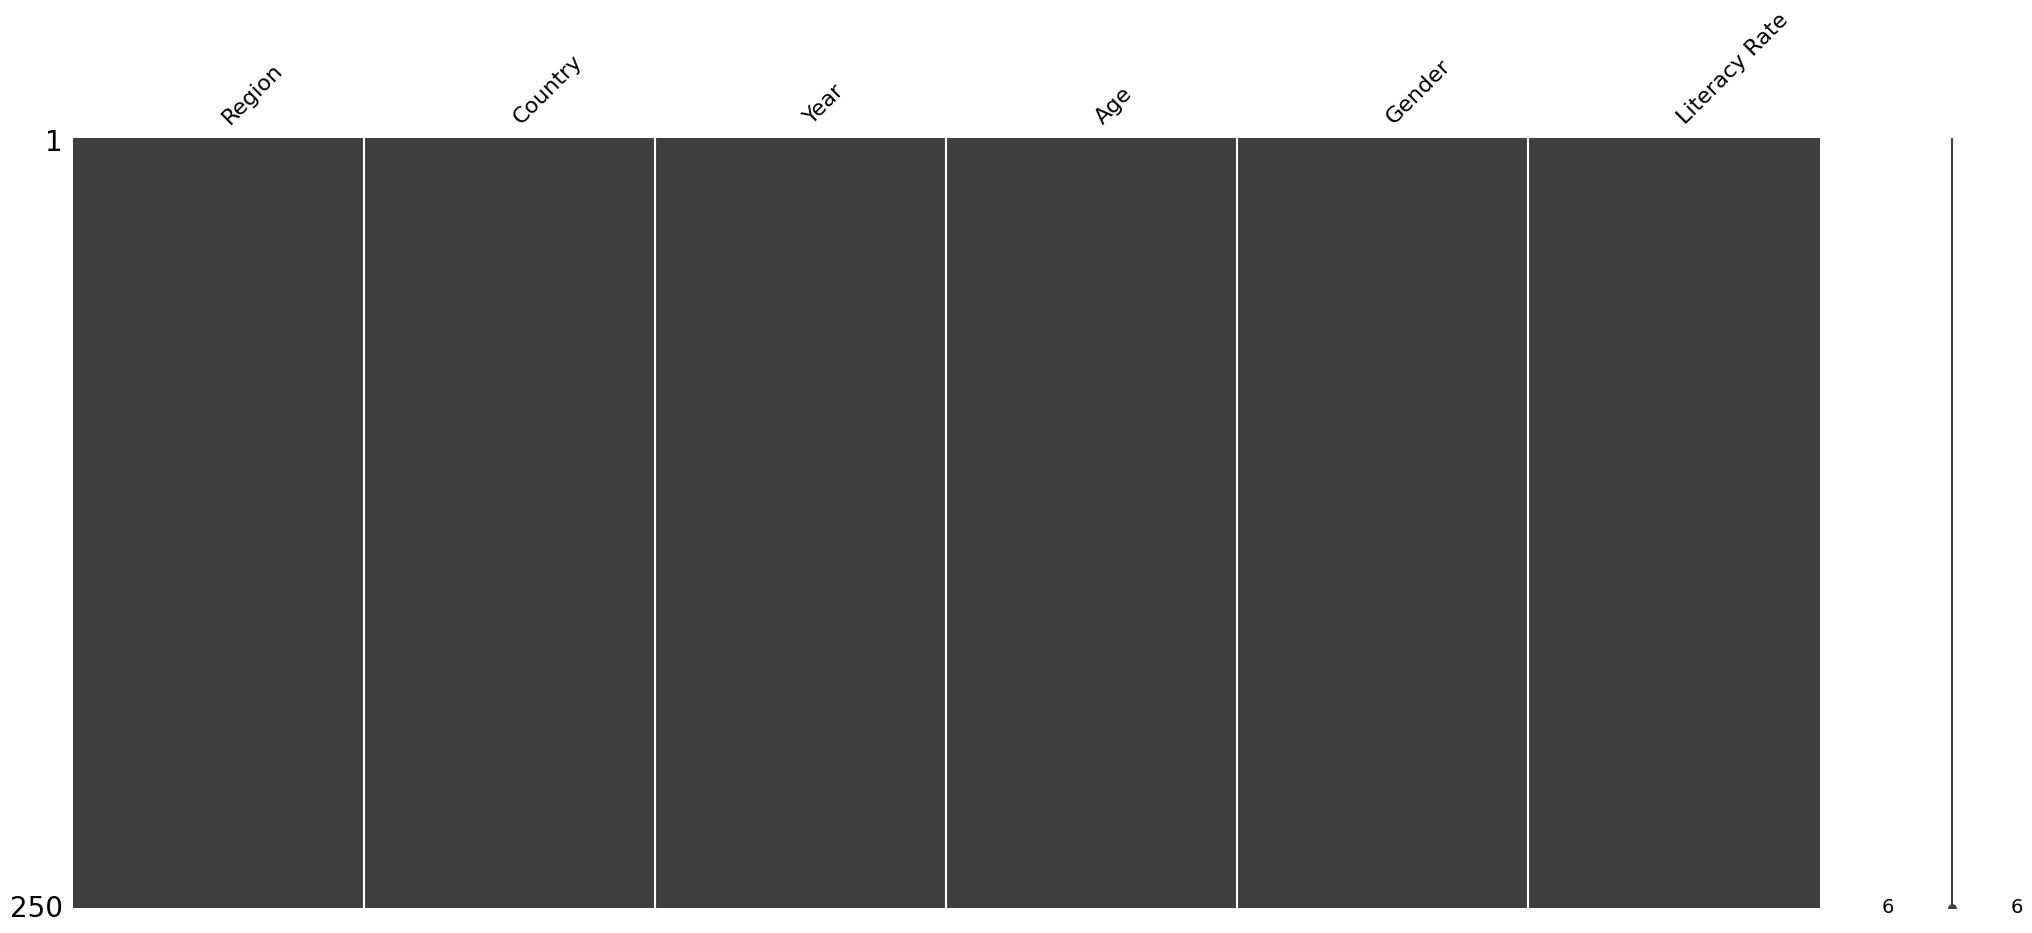

In [8]:
%matplotlib inline
msno.matrix(literacy_df.sample(250))

Using a reusable function to determine how much data is missing and needs to drop

In [9]:
def check_df_null_percentage(df):
    missing_values_count= df.isna().sum()
    total_cells = np.product(df.shape)
    total_missing = missing_values_count.sum()
    percent_missing = (total_missing/total_cells) * 100
    total_rows = df.shape[0]
    # created percentage null checks for each row 
    for col in df:
        series = df[col]
        each_series_null_values = series.isna().sum()
        percentage_each_series = (each_series_null_values/total_rows) * 100
        percentage_each_series_df  = (each_series_null_values/total_cells) * 100
        text = (
            f'''Series column {col} has {each_series_null_values} missing values which is 
            {percentage_each_series.round(decimals=2)} % of row data or 
            {percentage_each_series_df.round(decimals=2)} of the whole dataset'''
        )
        print(text)
    print(f"There is {percent_missing.round(decimals=2)}% missing data in your dataset" )

In [10]:
check_df_null_percentage(literacy_df)

Series column Region has 4 missing values which is 
            0.12 % of row data or 
            0.02 of the whole dataset
Series column Country has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Year has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Age has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Gender has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Literacy Rate has 5 missing values which is 
            0.15 % of row data or 
            0.03 of the whole dataset
There is 0.05% missing data in your dataset


Only a small subset (less than 5%) of our data is missing and can drop those missing rows. 

In [11]:
literacy_df.isna().sum()

Region           4
Country          0
Year             0
Age              0
Gender           0
Literacy Rate    5
dtype: int64

In [12]:
literacy_df.dropna(axis=0, inplace=True)
# literacy_df.isna().sum()

In [13]:
literacy_df.isna().sum()

Region           0
Country          0
Year             0
Age              0
Gender           0
Literacy Rate    0
dtype: int64

In [14]:
# literacy_df['Age'].unique() #values look consistent
# literacy_df['Year'].unique() # there is an underscore and wrong data of 3014
# literacy_df['Gender'].unique() # inconsistent naming convention male/female vs m/f
# literacy_df['Region'].unique() # values look consistent 
# literacy_df['Country'].value_counts() #values look consistent
# literacy_df['Literacy rate'].value_counts() # values looks good

In [15]:
literacy_df['Gender'] = literacy_df['Gender'].replace("F", "female") 
literacy_df['Gender'] =  literacy_df['Gender'].replace("M", "male") 
literacy_df['Year'] = literacy_df['Year'].replace("3014", "2014") 
literacy_df['Year'] = literacy_df['Year'].replace("2011_", "2011")



In [16]:
literacy_df.dtypes
# literacy_df.head(20)

Region           object
Country          object
Year             object
Age              object
Gender           object
Literacy Rate    object
dtype: object

In [17]:
literacy_df['Literacy Rate'].unique()

array(['0.1761206', '0.454171', '0.0841276', ..., '0.8972554',
       '0.7342576', '0.9272311'], dtype=object)

It appears that "Year" is an object and should be an integer. Also, literacy rate should be a float and rounded 2 decimal points.

There is a value in the "Literacy rate" that is a non float (it's a percentage). I will drop that value because I'm unsure how it was measured originally. It appears like a random typo and only 1 row. 

In [18]:
# literacy_df.dropna(axis=0, how="any", subset=['Literacy rate'], inplace=True)
literacy_df = literacy_df[pd.to_numeric(literacy_df['Literacy Rate'],errors='coerce').notnull()]

how to drop row that meets regex conditon <br>
https://stackoverflow.com/questions/52229998/remove-all-rows-that-meet-regex-condition

In [19]:
literacy_df['Year'] = literacy_df['Year'].astype(int)
literacy_df['Literacy Rate'] = literacy_df['Literacy Rate'].astype(float)

In [20]:
literacy_df['Literacy Rate'] = literacy_df['Literacy Rate'].round(decimals=2)
literacy_df.head(10)

,Region,Country,Year,Age,Gender,Literacy Rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.18
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.45
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.08
5,Central and Southern Asia,Afghanistan,2011,25-64,male,0.38
6,Central and Southern Asia,Afghanistan,2011,65+,female,0.20
7,Central and Southern Asia,Afghanistan,2018,<15,female,0.30
8,Central and Southern Asia,Afghanistan,2018,<15,male,0.55
9,Central and Southern Asia,Afghanistan,2018,15-24,female,0.56
10,Central and Southern Asia,Afghanistan,2018,15-24,male,0.74
11,Central and Southern Asia,Afghanistan,2018,25-64,female,0.14


In [21]:
literacy_df.dtypes

Region            object
Country           object
Year               int64
Age               object
Gender            object
Literacy Rate    float64
dtype: object

In [22]:
literacy_df.head()

,Region,Country,Year,Age,Gender,Literacy Rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.18
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.45
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.08
5,Central and Southern Asia,Afghanistan,2011,25-64,male,0.38
6,Central and Southern Asia,Afghanistan,2011,65+,female,0.20


univariate data:  literacy rate (hist) region/country (bar)  <br/>
multivariate data: literacy and country (heatmap, scatterplot) literacy and gender (line-graph) <br/>

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

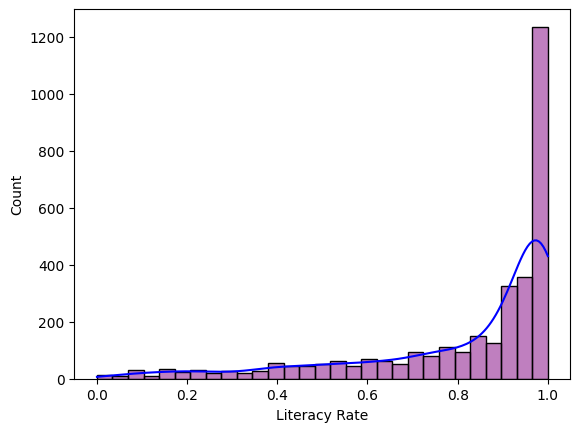

In [39]:
# https://www.sharpsightlabs.com/blog/seaborn-histogram/
graf = sns.histplot(data=literacy_df, x='Literacy Rate', color='purple', kde = True, alpha = .5)
graf.lines[0].set_color('blue')


There were more countries that have

In [25]:
region_series= literacy_df['Region'].value_counts()
region_series


Latin America and the Caribbean     940
Sub-Saharan Africa                  770
Northern Africa and Western Asia    568
Europe and Northern America         332
Central and Southern Asia           306
Eastern and South-Eastern Asia      281
Oceania                              96
Name: Region, dtype: int64

Text(0.5, 0, 'Count')

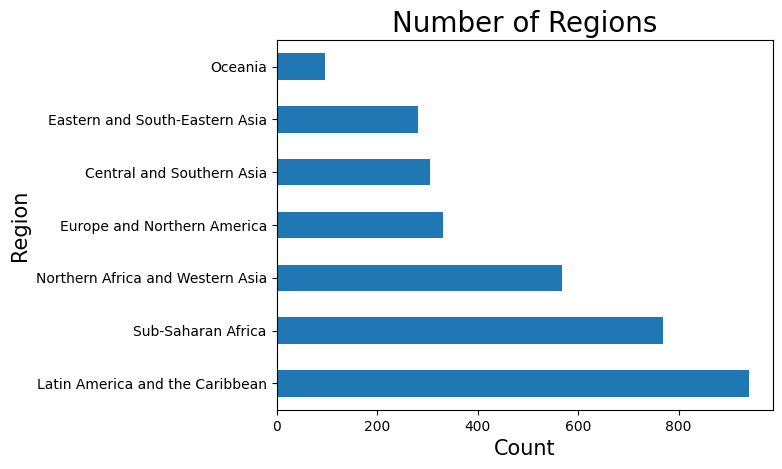

In [26]:
region_series.plot(kind= 'barh')
plt.title('Number of Regions', fontsize = 20)
plt.ylabel('Region', fontsize=15)
plt.xlabel('Count', fontsize=15)

In [27]:
# sns.barplot(literacy_df, x=region_series, y='Region' ) #why doesnt this work?!

In [ ]:
sns.boxplot(x=literacy_df['Literacy Rate'])

<Axes: xlabel='Literacy Rate', ylabel='Age'>

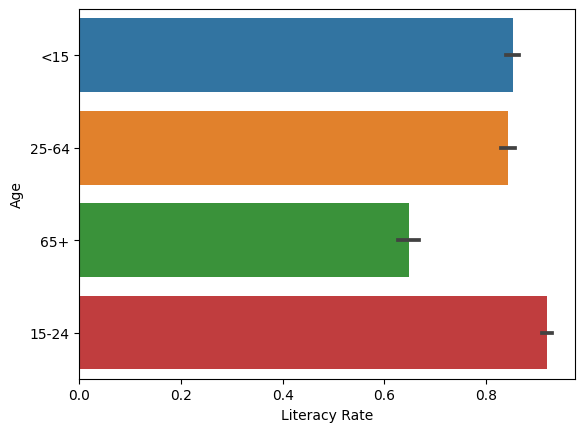

In [ ]:

sns.barplot(data=literacy_df, x='Literacy Rate', y='Age')

<Axes: xlabel='Literacy Rate', ylabel='Gender'>

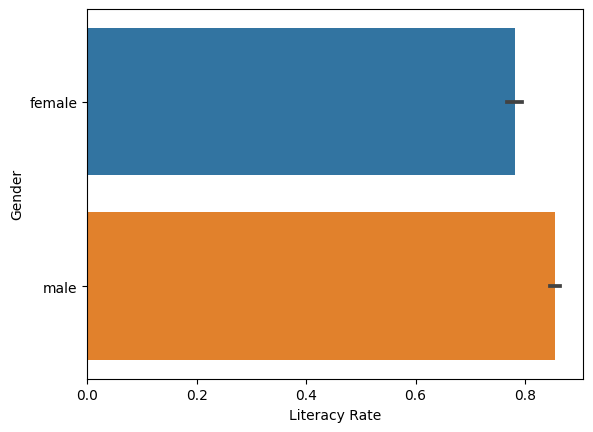

In [33]:
sns.barplot(data=literacy_df, x='Literacy Rate', y='Gender')